# Fall‑risk prediction on the gait analysis data

This notebook demonstrates how to load the combined gait dataset, preprocess it, handle class imbalance, train multiple models (Logistic Regression, Random Forest and XGBoost), and evaluate them on a hold‑out test set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_output.csv')

# Map labels to binary
y = df['Faller'].map({'F': 1, 'NF': 0})

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df_train, df_test, y_train, y_test = train_test_split(
    df, y, test_size=0.25, random_state=42, stratify=y
)

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (128, 63)
Test shape: (43, 63)


In [31]:
# Load full dataset
cols = [c for c in df.columns if c not in ['ID', 'Faller']]

X_train = df_train[cols].apply(pd.to_numeric, errors="coerce")
X_test  = df_test[cols].apply(pd.to_numeric, errors="coerce")

# Fill NaN AFTER split
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_test.median())

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_df = X_train.copy()
train_df['label'] = y_train.values

majority = train_df[train_df['label'] == 0]
minority = train_df[train_df['label'] == 1]

minority_over = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

train_bal = pd.concat([majority, minority_over])

X_train_bal = train_bal.drop(columns=['label'])
y_train_bal = train_bal['label']

print("Balanced training shape:", X_train_bal.shape)
print("Balanced class distribution:")
print(y_train_bal.value_counts())

X_train shape: (128, 61)
X_test shape: (43, 61)
Balanced training shape: (206, 61)
Balanced class distribution:
label
0    103
1    103
Name: count, dtype: int64


In [10]:
# Load RunScribe dataset
cols = [
    "GCTime_mean",
    "GCTime_sdTotal",
    "GCTime_cv",
    "RSST_mean",
    "RSST_sdTotal",
    "RSST_cv",
    "LSST_mean",
    "LSST_sdTotal",
    "LSST_cv",
    "RSwT_mean",
    "RSwT_sdTotal",
    "RSwt_cv",
    "LSwT_mean",
    "LSwT_sdTotal",
    "LSwT_cv",
    "DST_mean",
    "DST_sdTotal",
    "DST_cv",
    "StepTime_mean",
    "StepTime_sdTotal",
    "StepTime_cv",
    "Velocity",
    "Time2FirstQuartile_Velocity",
    "Time2Median_Velocity",
    "Time2ThirdQuartile_Velocity"
]

X_train = df_train[cols].apply(pd.to_numeric, errors='coerce')
X_test  = df_test[cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values AFTER splitting
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_test.median())

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_df = X_train.copy()
train_df['label'] = y_train.values  # add label to training frame

majority = train_df[train_df['label'] == 0]
minority = train_df[train_df['label'] == 1]

minority_over = resample(
    minority, replace=True,
    n_samples=len(majority),
    random_state=42
)

train_bal = pd.concat([majority, minority_over])

X_train_bal = train_bal.drop(columns=['label'])
y_train_bal = train_bal['label']

print("Balanced training shape:", X_train_bal.shape)
print("Balanced class distribution:")
print(y_train_bal.value_counts())

X_train shape: (128, 25)
X_test shape: (43, 25)
Balanced training shape: (206, 25)
Balanced class distribution:
label
0    103
1    103
Name: count, dtype: int64


In [17]:
# Load Garmin / Apple dataset
cols = [
    "DST_mean",
    "StepTime_mean",
    "StepTime_sdTotal",
    "Time2FirstQuartile_Velocity",
    "Time2Median_Velocity",
    "Time2ThirdQuartile_Velocity",
    "Velocity"
]

X_train = df_train[cols].apply(pd.to_numeric, errors='coerce')
X_test  = df_test[cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values AFTER splitting
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_test.median())

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_df = X_train.copy()
train_df['label'] = y_train.values  # add label to training frame

majority = train_df[train_df['label'] == 0]
minority = train_df[train_df['label'] == 1]

minority_over = resample(
    minority, replace=True,
    n_samples=len(majority),
    random_state=42
)

train_bal = pd.concat([majority, minority_over])

X_train_bal = train_bal.drop(columns=['label'])
y_train_bal = train_bal['label']

print("Balanced training shape:", X_train_bal.shape)
print("Balanced class distribution:")
print(y_train_bal.value_counts())

X_train shape: (128, 7)
X_test shape: (43, 7)
Balanced training shape: (206, 7)
Balanced class distribution:
label
0    103
1    103
Name: count, dtype: int64


In [24]:
# Phone dataset
cols = [
    "DST_cv", "DST_mean", "DST_sdTotal",
    "GCTime_cv", "GCTime_mean", "GCTime_sdTotal",
    "HR_V", "LSST_cv", "LSST_mean", "LSST_sdTotal",
    "MSE_V_area", "MSE_V_slope",
    "RMS_V", "RMSR_V",
    "RQA_V_Det", "RQA_V_Ent", "RQA_V_MaxLine", "RQA_V_Rec",
    "RSST_cv", "RSST_mean", "RSST_sdTotal",
    "StepTime_cv", "StepTime_mean", "StepTime_sdTotal",
    "Time2FirstQuartile_Velocity",
    "Time2Median_Velocity",
    "Time2ThirdQuartile_Velocity",
    "Velocity"
]

X_train = df_train[cols].apply(pd.to_numeric, errors='coerce')
X_test  = df_test[cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values AFTER splitting
X_train = X_train.fillna(X_train.median())
X_test  = X_test.fillna(X_test.median())

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_df = X_train.copy()
train_df['label'] = y_train.values  # add label to training frame

majority = train_df[train_df['label'] == 0]
minority = train_df[train_df['label'] == 1]

minority_over = resample(
    minority, replace=True,
    n_samples=len(majority),
    random_state=42
)

train_bal = pd.concat([majority, minority_over])

X_train_bal = train_bal.drop(columns=['label'])
y_train_bal = train_bal['label']

print("Balanced training shape:", X_train_bal.shape)
print("Balanced class distribution:")
print(y_train_bal.value_counts())

X_train shape: (128, 28)
X_test shape: (43, 28)
Balanced training shape: (206, 28)
Balanced class distribution:
label
0    103
1    103
Name: count, dtype: int64


Logistic Regression:
Accuracy: 0.5581395348837209
Precision: 0.14285714285714285
Recall: 0.2222222222222222
F1: 0.17391304347826086
ROC AUC: 0.43790849673202614


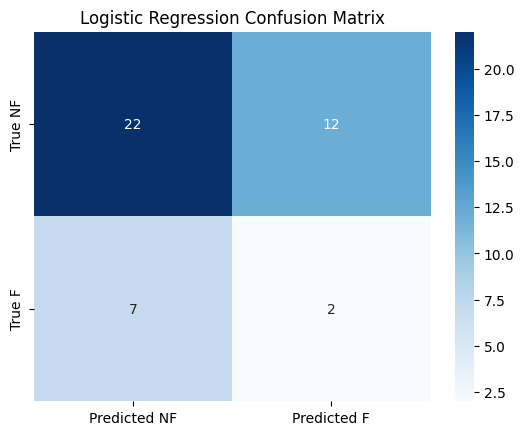

In [32]:
# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_bal)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, zero_division=0)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print('Logistic Regression:')
print('Accuracy:', acc_lr)
print('Precision:', prec_lr)
print('Recall:', rec_lr)
print('F1:', f1_lr)
print('ROC AUC:', auc_lr)

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted NF','Predicted F'], yticklabels=['True NF','True F'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest:
Accuracy: 0.7209302325581395
Precision: 0.2
Recall: 0.1111111111111111
F1: 0.14285714285714285
ROC AUC: 0.6601307189542484


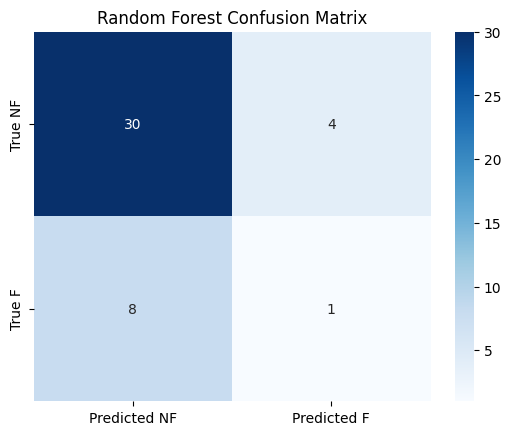

In [33]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, zero_division=0)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print('Random Forest:')
print('Accuracy:', acc_rf)
print('Precision:', prec_rf)
print('Recall:', rec_rf)
print('F1:', f1_rf)
print('ROC AUC:', auc_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted NF','Predicted F'], yticklabels=['True NF','True F'])
plt.title('Random Forest Confusion Matrix')
plt.show()

XGBoost:
Accuracy: 0.6744186046511628
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.5980392156862745


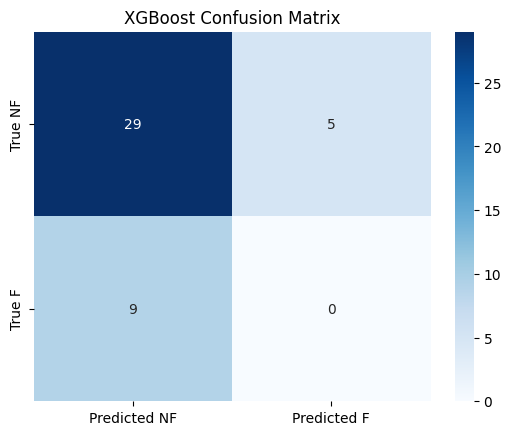

In [34]:
# XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=200, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, zero_division=0)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print('XGBoost:')
print('Accuracy:', acc_xgb)
print('Precision:', prec_xgb)
print('Recall:', rec_xgb)
print('F1:', f1_xgb)
print('ROC AUC:', auc_xgb)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted NF','Predicted F'], yticklabels=['True NF','True F'])
plt.title('XGBoost Confusion Matrix')
plt.show()

Support Vector Machine:
Accuracy: 0.5581395348837209
Precision: 0.08333333333333333
Recall: 0.1111111111111111
F1: 0.09523809523809523
ROC AUC: 0.4362745098039216


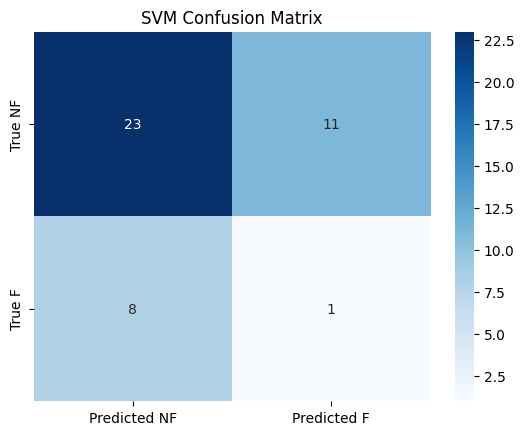

In [35]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC(
    kernel='rbf',            
    probability=True,        
    random_state=42,
    C=1.0,                   
    gamma='scale'            
)

svm_model.fit(X_train_bal, y_train_bal)

y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, zero_division=0)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print('Support Vector Machine:')
print('Accuracy:', acc_svm)
print('Precision:', prec_svm)
print('Recall:', rec_svm)
print('F1:', f1_svm)
print('ROC AUC:', auc_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted NF', 'Predicted F'],
            yticklabels=['True NF', 'True F'])
plt.title('SVM Confusion Matrix')
plt.show()

Epoch 1/30


/Users/eshaanpal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5279 - loss: 0.7505 - val_accuracy: 0.1667 - val_loss: 0.8637
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6396 - loss: 0.6632 - val_accuracy: 0.1905 - val_loss: 0.8536
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6950 - loss: 0.6347 - val_accuracy: 0.1905 - val_loss: 0.8514
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7352 - loss: 0.5602 - val_accuracy: 0.3571 - val_loss: 0.8306
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6738 - loss: 0.5575 - val_accuracy: 0.3571 - val_loss: 0.8003
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7525 - loss: 0.5360 - val_accuracy: 0.4048 - val_loss: 0.7659
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7087 - loss: 0.5483 - val_accuracy: 0.4762 - val_loss: 0.7439
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7747 - loss: 0.5074 - val_accuracy: 0.4762 - val_loss: 0.7136
Epoch 9/30
6/6 ━━━

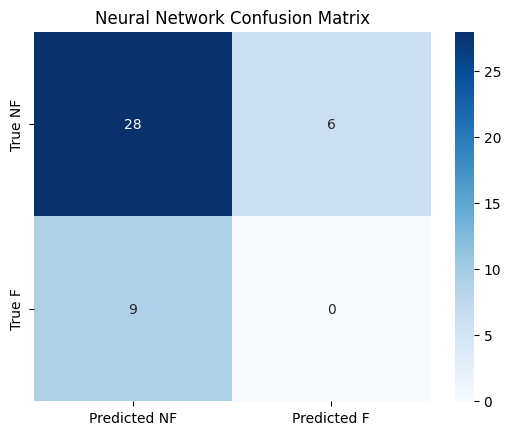

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_bal)
X_test_nn = scaler.transform(X_test)

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history = nn_model.fit(X_train_nn, y_train_bal,
                       epochs=30,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

y_prob_nn = nn_model.predict(X_test_nn).ravel()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn, zero_division=0)
rec_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_prob_nn)

print('Feedforward Neural Network:')
print('Accuracy:', acc_nn)
print('Precision:', prec_nn)
print('Recall:', rec_nn)
print('F1:', f1_nn)
print('ROC AUC:', auc_nn)

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted NF', 'Predicted F'],
            yticklabels=['True NF', 'True F'])
plt.title('Neural Network Confusion Matrix')
plt.show()


In [37]:
results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'Support Vector Machine',
        'Neural Network'
    ],
    'Accuracy': [acc_lr, acc_rf, acc_xgb, acc_svm, acc_nn],
    'Precision': [prec_lr, prec_rf, prec_xgb, prec_svm, prec_nn],
    'Recall': [rec_lr, rec_rf, rec_xgb, rec_svm, rec_nn],
    'F1': [f1_lr, f1_rf, f1_xgb, f1_svm, f1_nn],
    'ROC AUC': [auc_lr, auc_rf, auc_xgb, auc_svm, auc_nn]
})

results


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.558140,0.142857,0.222222,0.173913,0.437908
1,Random Forest,0.720930,0.200000,0.111111,0.142857,0.660131
2,XGBoost,0.674419,0.000000,0.000000,0.000000,0.598039
3,Support Vector Machine,0.558140,0.083333,0.111111,0.095238,0.436275
4,Neural Network,0.651163,0.000000,0.000000,0.000000,0.464052
